In [ ]:
import statsmodels.api as sm
import matplotlib
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
df = pd.read_excel('Sample - Superstore.xls')

# Studying the data

In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

## comparing the three categories

In [ ]:
#comparing the furniture with other categories
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
tech = df.loc[df['Category'] == 'Technology']

furniture.shape, office.shape,tech.shape



((2121, 21), (6026, 21), (1847, 21))

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
        'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
        'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
tech.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
tech = tech.sort_values('Order Date')


furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
tech = tech.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
tech = tech.set_index('Order Date')


In [ ]:
furniture.head(5)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [ ]:
office.head(5)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [ ]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
y_tech = tech['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date': y_furniture.index,
                          'Sales': y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index,
                       'Sales': y_office.values})
tech = pd.DataFrame({'Order Date': y_tech.index,
                       'Sales': y_tech.values})

store = furniture.merge(office, how='inner', on='Order Date')
store = store.merge(tech, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales',
             'Sales_y': 'office_sales', 'Sales': 'tech_sales'}, inplace=True)

store.head()


,Order Date,furniture_sales,office_sales,tech_sales
0,2014-01-01,480.194231,285.357647,449.041429
1,2014-02-01,367.931600,63.042588,229.787143
2,2014-03-01,857.291529,391.176318,2031.948375
3,2014-04-01,567.488357,464.794750,613.028933
4,2014-05-01,432.049188,324.346545,564.698588


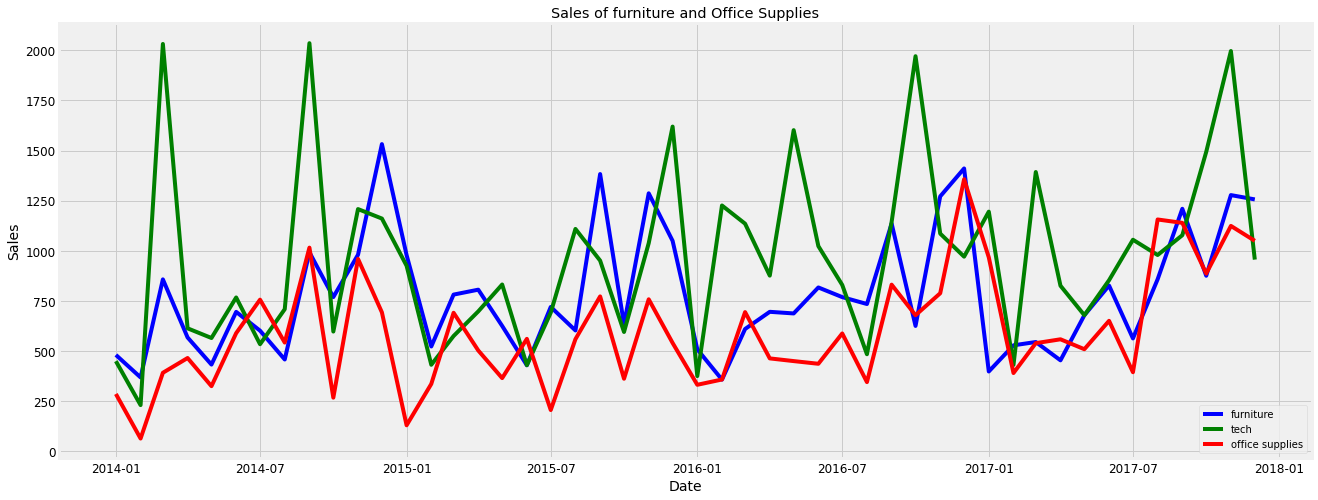

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'],
         'b-', label='furniture')
plt.plot(store['Order Date'], store['tech_sales'],
         'g-', label='tech')
plt.plot(store['Order Date'], store['office_sales'],
         'r-', label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture and Office Supplies')
plt.legend()


# data pre processing : selecting Furniture

In [ ]:
furniture.head(2)

,Order Date,Sales
0,2014-01-01,480.194231
1,2014-02-01,367.931600


In [ ]:
cols = ['Row ID',
        'Order ID',
        'Ship Date',
        'Ship Mode',
        'Customer ID',
        'Customer Name',
        'Segment',
        'Country',
        'City',
        'State',
        'Postal Code',
        'Region',
        'Product ID',
        'Category',
        'Quantity',
        'Discount',
        'Profit']


In [ ]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

## indexing the data

In [ ]:
# adding sales of same date
furniture_df = furniture.groupby('Order Date')['Sales'].sum().reset_index() 

#setting order date as index
furniture_df = furniture.set_index('Order Date')
# resampling and taking mean
y = furniture_df['Sales'].resample('MS').mean()
print(y['2017':])

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64


# Visualizing time series data

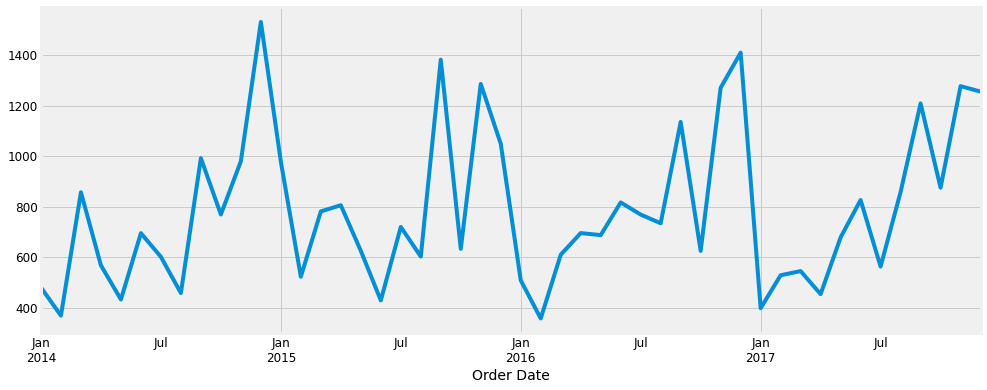

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

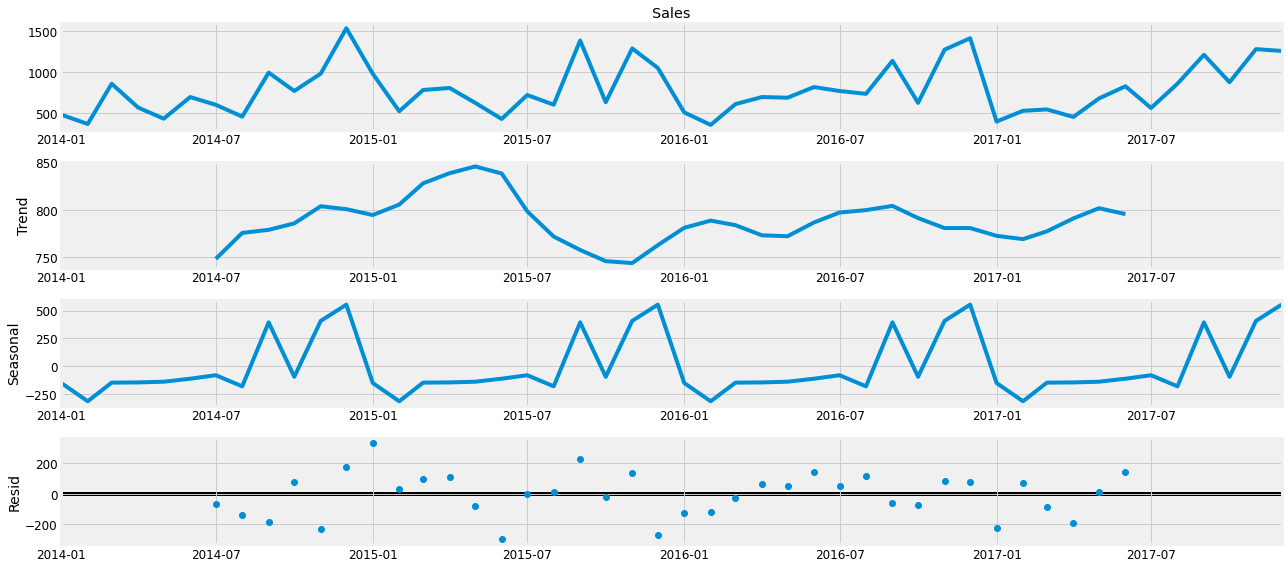

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='addictive')
fig = decomposition.plot()
plt.show()

# Till day 5